# COS3a Übung 3
---
# Lösung

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

## Übung
### Aufgabe 5

#### 5.a)
Würfeln Sie zwei ganzzahlige Zufallszahlen zwischen 1 und 6 und addieren Sie das Ergebnis. Fügen Sie das Ergebnis einer Liste hinzu und wiederholen Sie dieses Vorgehen 1 000 Mal. Erzeugen Sie anschließend ein Histogramm mit der Liste (denken Sie an eine sinnvolle Wahl von `bins`).

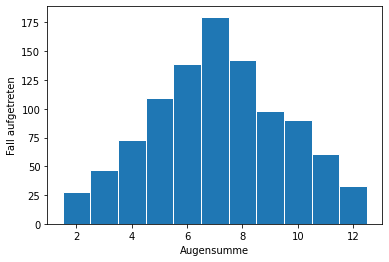

In [4]:
throw_sums = []
for _ in range(1000):
    throw_sums.append(random.randint(1,6) + random.randint(1,6))

plt.hist(throw_sums, bins=range(2, 14), align="left", edgecolor='white')
plt.xlabel("Augensumme")
plt.ylabel("Fall aufgetreten")
plt.show()

#### 5.b)
Führen Sie die Simulation erneut durch. Würfeln Sie hier nun jedoch mit 1 000 Würfeln und ermitteln Sie deren Summe. Setzen sie beim Plotten das Keyword `bins` auf `'auto'`. Wie ändert sich die Form der Verteilung?

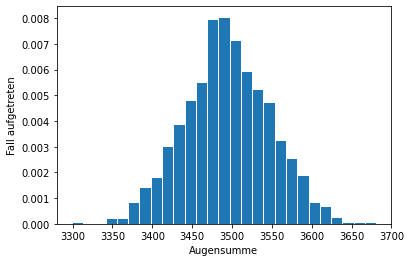

In [6]:
throw_sums = []
# 1000 mal würfeln
for _ in range(1000):
    # mit 1000 Würfeln
    dice_sum = 0
    for _ in range(1000):
        dice_sum += random.randint(1,6)
    throw_sums.append(dice_sum)
plt.hist(throw_sums, bins="auto", align="left", edgecolor='white', density=True)
plt.xlabel("Augensumme")
plt.ylabel("Fall aufgetreten")
plt.show()

Antwort: Die Verteilung ist schmaler und das Verteilungsgewicht liegt stärker am Mittelwert. Dies bedeutet, dass eine gewürfelte Augensumme nahe am Mittelwert wahrscheinlicher ist als beim Zwei-Würfel-Experiment und dass Extremwerte seltener auftreten.

#### Ist die Verteilung Poissonverteilt?

In [7]:
throw_sums = []
# 100000 mal würfeln
for _ in range(100000):
    # mit 1000 Würfeln
    dice_sum = 0
    for _ in range(1000):
        dice_sum += random.randint(1,6)
    throw_sums.append(dice_sum)

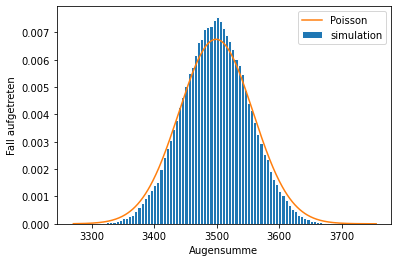

In [11]:
# continuierliche poisson-verteilung
def poisson(x, lam):
    return 1/np.sqrt(2*np.pi*lam)*np.exp(-(x-lam)**2/(2*lam))

mean_value = int(np.mean(throw_sums))
min_value = min(throw_sums)
max_value = max(throw_sums)

x_values = list(range(min(throw_sums), max(throw_sums)))
y_values = [poisson(x, mean_value) for x in x_values]

plt.hist(throw_sums, bins=range(min_value, max_value+2, 5), align="left", edgecolor='white', density=True, label="simulation")
plt.plot(x_values, y_values, label="Poisson")
plt.xlabel("Augensumme")
plt.ylabel("Fall aufgetreten")
plt.legend()
plt.show()

#### 5.c)
Die Streuung normalverteilter Zufallsprozesse lässt sich über die Standardabweichung beschreiben. Als erweitertes Maß für die Stärke der Streuung lässt sich der Variationskoeffizient $v$ berechnen. Dieser drückt das relative Streumaß aus und ist definiert durch:

\begin{equation*}
v = \frac{\mu}{\sigma},
\end{equation*}

wobei $\mu$ die Standardabweichung und $\sigma$ den Mittelwert darstellt.

Berechnen Sie $\mu$, $\sigma$ und $v$ für die Augensumme einer Simulation mit 2 sechseitigen Würfeln. Berechnen Sie die Parameter mit 1 000 Würfen.

In [5]:
throw_sums = []
for _ in range(1000):
    throw_sums.append(random.randint(1,6)+random.randint(1,6))
print(f"µ = {np.std(throw_sums)}")
print(f"σ = {np.mean(throw_sums)}")
print(f"v = {np.std(throw_sums)/np.mean(throw_sums)}")

µ = 2.428462682439242
σ = 6.913
v = 0.3512892640589096


#### 5.d)
Berechnen Sie nun $v$ für ein Würfelexperiment mit zwei, zehn, 100, 500,  1 000 Würfeln und tragen Sie $v$ gegen die Anzahl der Würfel auf. Lassen Sie jede Simulation über 1 000 Würfe laufen. Welchen Wert für $v$ erwarten Sie für eine unendliche Anzahl an Würfeln?

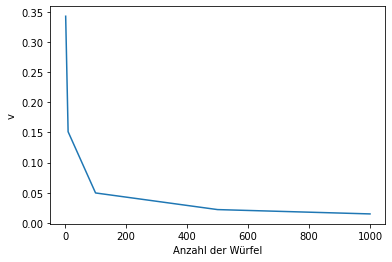

In [69]:
run_results = []
run_dice_counts = [2, 10, 100, 500, 1000]

for number_of_dices in run_dice_counts:
    throw_sums = []
    for _ in range(1000):
        sum_of_dice = 0
        for _ in range(number_of_dices):
            sum_of_dice += random.randint(1,6)
        throw_sums.append(sum_of_dice)
    run_results.append(np.std(throw_sums)/np.mean(throw_sums))

plt.plot(run_dice_counts, run_results)
plt.xlabel("Anzahl der Würfel")
plt.ylabel("v")
plt.show()

Antwort: $v$ $\rightarrow$ 0

#### Darstellen der Wahrscheinlichkeitsverteilung aus Vorlesung

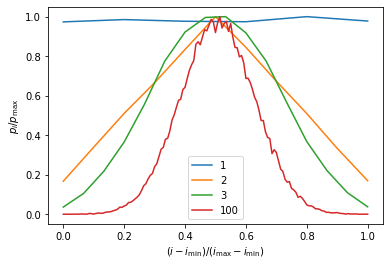

In [62]:
run_dice_counts = [1, 2, 3, 100]

for number_of_dices in run_dice_counts:
    
    casts = []
    for _ in range(100000):
        sum_of_dice = 0
        for _ in range(number_of_dices):
            sum_of_dice += random.randint(1,6)
        casts.append(sum_of_dice)
        
    number_of_bins = range(min(casts), max(casts)+2)
    
    # Einteilung der Datenpunkte in Fächer. counts ist die Zahl der Elemente in jedem Fach.
    counts, bins = np.histogram(casts, bins=number_of_bins)
    bins = bins[:-1]
    
    # normalisieren der Augensummen
    normalized_bins = []
    for i in bins:
        normalized_bins.append((i-min(bins))/(max(bins)-min(bins)))
    
    # normierung auf wahrscheinlichstes Ergebnis
    counts = counts / max(counts)
        
    # Auftragung der normalisierten Elemente, so gewichtet, dass die jeweils größte Anzahl auf 1 normiert ist.
    plt.plot(normalized_bins, counts, label=str(number_of_dices))

    
plt.legend()
plt.xlabel(r"$(i-i_\mathrm{min})/(i_\mathrm{max} - i_\mathrm{min})$")
plt.ylabel(r"$p_i / p_\mathrm{max}$")
plt.show()

**Gesetz der Großen Zahlen: Bei hinreichend großen Werten von N spielen nur Verteilungen in unmittelbarer Nähe der wahrscheinlichsten Verteilung eine Rolle.**

\begin{equation}
\ln(\Omega_\mathrm{total}) \approx \ln(\Omega_\mathrm{max})
\end{equation}

$\Omega_\mathrm{total}$ ist Zahl aller möglichen Würfelergebnisse, $\ln(\Omega_\mathrm{max})$ ist die Zahl der Würfelkombinationen, die die wahrscheinlichste Augensumme ergeben.